___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
from apyori import apriori

In [2]:
df = pd.read_csv('Groceries.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9835, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [6]:
# додамо усі продані товари в один список
all_products = []
for sublist in df.values.tolist():
    for item in sublist:
        if type(item)==str:
            all_products.append(item)

In [7]:
all_products[:5]

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit']

In [8]:
product_count = Counter(all_products)
print("Топ-3 продукти, що продаються:", product_count.most_common(3))

Топ-3 продукти, що продаються: [('whole milk', 2513), ('other vegetables', 1903), ('rolls/buns', 1809)]


In [9]:
# список списків проданих товарів у кожному чеку (прибрали NaN)
records = []
for sublist in df.values.tolist():
    products = []
    for item in sublist:
        if type(item)==str:
            products.append(item)
    records.append(products)

In [10]:
records[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [11]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

In [12]:
# приклад для першого запису
for item in association_rules:
    print(item)
    print()
    print(item[0]) # пара продуктів
    print(item[1]) # support
    print(item[2][0][2]) # confidence
    print(item[2][0][3]) # lift
    break

RelationRecord(items=frozenset({'whipped/sour cream', 'baking powder'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)])

frozenset({'whipped/sour cream', 'baking powder'})
0.004575495678698526
0.25862068965517243
3.607850330154072


In [13]:
products_apriori = []
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    
    apriori_dict = {
            'pair': items[0] + '-> ' + items[1],
            'support': item[1],
            'confidence': item[2][0][2],
            'lift': item[2][0][3]
        }
    products_apriori.append(apriori_dict)

In [14]:
products_apriori[:2]

[{'pair': 'root vegetables-> beef',
  'support': 0.017386883579054397,
  'confidence': 0.3313953488372093,
  'lift': 3.0403668431100312},
 {'pair': 'berries-> whipped/sour cream',
  'support': 0.009049313675648195,
  'confidence': 0.27217125382262997,
  'lift': 3.796885505454703}]

In [15]:
df_apriori = pd.DataFrame(products_apriori)

In [16]:
df_apriori.head()

,pair,support,confidence,lift
0,root vegetables-> beef,0.017387,0.331395,3.040367
1,berries-> whipped/sour cream,0.009049,0.272171,3.796886
2,liquor-> bottled beer,0.004677,0.422018,5.240594
3,red/blush wine-> bottled beer,0.004881,0.253968,3.153760
4,flour-> sugar,0.004982,0.286550,8.463112


In [17]:
# топ-2 пари продуктів, що продаються
df_apriori.sort_values(by = 'support', ascending=False).head(2)

,pair,support,confidence,lift
0,root vegetables-> beef,0.017387,0.331395,3.040367
36,root vegetables-> tropical fruit,0.012303,0.342776,3.144780


### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('Mall_Customers.csv')

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.drop(columns=['CustomerID'], inplace=True)

In [24]:
df = pd.get_dummies(data=df, columns=['Gender'])

In [25]:
df.drop(columns=['Gender_Female'], inplace=True)

In [26]:
df = df.rename(columns={'Gender_Male':'Gender'}) # 1 - male, 0 - female

In [27]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [28]:
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


## KMeans

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

In [31]:
kmeans.fit(df)

KMeans(n_clusters=2)

In [32]:
kmeans.cluster_centers_

array([[28.95294118, 62.17647059, 73.62352941,  0.44705882],
       [46.16521739, 59.36521739, 32.88695652,  0.43478261]])

In [33]:
kmeans.inertia_

212889.44245524294

In [34]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [35]:
from sklearn.metrics import silhouette_score

Для silhouette_score найкраще значення 1, а найгірше -1. Значення біля 0 вказують на перекривання кластерів. Негативні значення, як правило, вказують на те, що вибірку було призначено не тому кластеру, оскільки інший кластер більш схожий.

Text(0, 0.5, 'Inertia')

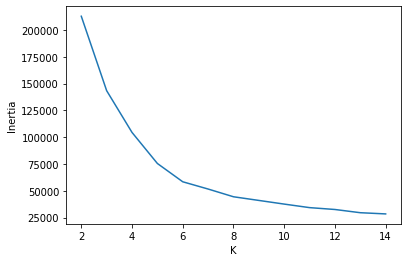

In [36]:
inertias = []
silhouette = []

sizes = range(2, 15)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k,)
    k2.fit(df)
    inertias.append(k2.inertia_)
    silhouette.append(silhouette_score(df, k2.labels_))
    

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [37]:
np.argmax(silhouette) # індекс найбільшого значення в списку

4

Отже, виходячи з дистанцій до центрів кластерів (inertia) та silhouette_score, робимо висновок, що оптимальним є 5 кластерів

In [38]:
np.max(silhouette)

0.45205475380756527

## DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db_cluster = DBSCAN(eps=3, min_samples=2) 
# eps - Максимальна дистанція між двома об'єктами, щоб вони вважались сусідами
# min_samples - мінімальная кількість об'єктів в околі точки (враховуючи її саму), 
# щоб вважати її центром кластеру
db_cluster.fit(df)

DBSCAN(eps=3, min_samples=2)

In [41]:
db_cluster.labels_

array([-1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,
        4, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1,  5, -1, -1, -1,  6,  5,
       -1, -1, -1,  6,  7, -1, -1,  7,  7, -1, -1,  8,  8,  8, -1,  9, -1,
        9, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, 10, -1, 11, -1, -1,
       -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, -1, -1, -1, -1, -1,
       -1, -1, -1, 13, -1, 13, 12, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [42]:
silhouette_score(df,db_cluster.labels_ )

-0.44021955444156974

In [43]:
np.unique(db_cluster.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [44]:
db_silhouette = []

eps_s = np.arange(8,12.75,0.25)

for eps in eps_s:
    db2 = DBSCAN(eps=eps, min_samples=4)
    db2.fit(df)
    db_silhouette.append(silhouette_score(df, db2.labels_))

In [45]:
# індекс параметру eps із найкращим значенням silhouette_score
idx = np.argmax(db_silhouette)

In [46]:
eps_best = eps_s[idx]
print(f'Найкраще значення параметру eps: {eps_best}')
print(f'Найкраще значення параметру silhouette_score: {np.max(db_silhouette)}')

Найкраще значення параметру eps: 12.5
Найкраще значення параметру silhouette_score: 0.25541229267169685


In [47]:
# Тренуэмо модель із найкращими параметарми
db_best = DBSCAN(eps=eps_best, min_samples=4)
db_best.fit(df)

# кількість класів найкращої моделі
# віднімаємо 1, оскільки алгоритм DBSCAN створює додатковий клас -1, яким помічає шум
db_n_classes = len(np.unique(db_best.labels_)) - 1
print(f"Кількість кластерів: {db_n_classes}")

Кількість кластерів: 5


## hierarchical clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(df)

AgglomerativeClustering()

In [50]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [51]:
silhouette_score(df,hc.labels_ )

0.29916602844367

In [52]:
silhouette = []

n_clusters = range(2, 15)
for n in n_clusters:
    hc2 = AgglomerativeClustering(n_clusters=n,)
    hc2.fit(df)
    silhouette.append(silhouette_score(df, hc2.labels_))

In [53]:
silhouette

[0.29916602844367,
 0.3812859576468096,
 0.4102091359195185,
 0.43997527212476695,
 0.4428008535928764,
 0.42593881050851595,
 0.4223297424559345,
 0.37773214836148283,
 0.3612629591916317,
 0.35578893300642334,
 0.3505023495758093,
 0.3274517714733613,
 0.331135964202348]

In [54]:
print(f"Кількість кластерів: {np.argmax(silhouette) + 1} ")

Кількість кластерів: 5 


In [55]:
print(f"Найкращий silhouette_score: {np.max(silhouette)} ")

Найкращий silhouette_score: 0.4428008535928764 


Для кожного з алгоритмів найбільш оптимальною кількістю кластерів є 5. За значенням silhouette_score найбільш точним був алгоритм KMeans